In [1]:
import numpy as np
from scipy.special import factorial
from sympy.ntheory.continued_fraction import continued_fraction_reduce
import matplotlib.pyplot as plt
from jupyterquiz import display_quiz

# %config InlineBackend.figure_format = 'svg'

font = {'family' : 'serif',
        'size'   : 17,
        'weight' : 'normal'
       }

plt.rc('font', **font)

plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', titlesize=20)
# plt.rc('legend', fontsize=18)
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[T2A]{fontenc}')
plt.rc('text.latex', preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

def plot_e_limit(n_max=50):
    plt.figure(figsize = (11, 6))
    n_array = np.arange(1, n_max + 1)
    x_n = np.power(1 + 1. / n_array, n_array)
    #y_n = np.power(1 + 1. / n_array ** 2, n_array ** 2)
    z_n = 1 + np.cumsum(1.0 / factorial(np.arange(1, 20)))
    plt.plot(n_array, x_n, c='r', lw=2, marker='o', markeredgecolor='b')
    # plt.plot(n_array, y_n, c='orange', lw=2, marker='o', markeredgecolor='brown')
    plt.plot(n_array[1:20], z_n, c='orange', lw=2, marker='o',markeredgecolor='brown')
    plt.plot(n_array, np.e * np.ones_like(n_array), ls = '--', c='g')
    plt.ylim(2.61, 2.73)
    plt.xlim(1, n_max)
    plt.xlabel(r'$n$', fontsize=20)
    plt.title("Euler's number")
    plt.grid(ls=':')
    plt.legend([r'$x_n=\big(1+\frac 1n\big)^n$', # r'$\big(1+\frac 1{n^2}\big)^{n^2}$',
                '$s_n=\\sum\\limits_{k=0}^n\\frac 1{k!}$', '$e$']);
    plt.show();
    
convergents = []

e_cont_frac = [2,]
for i in range(21):
    frac = continued_fraction_reduce(e_cont_frac)
    convergents.append(frac.evalf())
    e_cont_frac.append(1 if i % 3 != 1 else 2 * ((i + 2) // 3))

def plot_e_taylor_convergent(y_min=1.9, y_max=3.1, n_min=0, n_max=20, semilogy=False):
    plt.figure(figsize = (11, 6))
    n_array = np.arange(n_max + 1)
    z_n = np.cumsum(1.0 / factorial(np.arange(n_max + 1)))
    if semilogy:
        plt.semilogy(n_array, np.abs(np.e - np.array(convergents[:n_max+1])),
                     c='r', lw=2, marker='o', markeredgecolor='b')
        plt.semilogy(n_array, np.e - z_n, c='orange', lw=2, marker='o',markeredgecolor='brown')
    else:
        plt.plot(n_array, convergents[:n_max+1], c='r', lw=2, marker='o', markeredgecolor='b')
        # plt.plot(n_array, y_n, c='orange', lw=2, marker='o', markeredgecolor='brown')
        plt.plot(n_array, z_n, c='orange', lw=2, marker='o',markeredgecolor='brown')
        plt.plot(n_array, np.e * np.ones_like(n_array), ls = '--', c='g')
    plt.xlim(n_min, n_max)
    if not semilogy:
        plt.ylim(y_min, y_max)
    plt.xlabel(r'$n$', fontsize=20)
    plt.title("Euler's number: series and continued fraction")
    plt.grid(ls=':')
    if semilogy:
        plt.legend([r'$|e - x_n|$', r'$e - s_n$'])
    else:
        plt.legend([r'$x_n$', # r'$\big(1+\frac 1{n^2}\big)^{n^2}$',
                    r'$s_n$', '$e$']);
    plt.show();
    
#<img src="https://elementy.ru/images/eltperson/arnold_vlad.jpg" style="float:left; margin-right:40px; width:250px">
#<img src="https://rus.team/images/article/5294/avatar_4x3.webp?actual=1597396572" style="float:right; width:250px">

# Эйлер вступает в дело

```{admonition} Принцип Арнольда
:class: note
Если какое-либо понятие имеет персональное имя, то это – не имя первооткрывателя. 
```

```{figure} https://elementy.ru/images/eltperson/arnold_vlad.jpg
---
width: 100px
align: left
---
В. И. Арнольд
```

```{figure} https://rus.team/images/article/5294/avatar_4x3.webp?actual=1597396572
---
width: 200px
align: right
---
Леонард Эйлер
```
                                                                                             
Вот и число $e$ открыл Яков Бернулли, а названо оно в честь другого швейцарского математика Леонарда Эйлера (1707 — 1783), долгое время работавшего в России. Впрочем, это неспроста: Эйлер открыл несколько поистине замечательных представлений числа $e$.

## Число $e$ в виде ряда

Например, Эйлер установил, что

```{math}
:label: e-series
    e = 1 + \frac 1{1!} + \frac 1{2!} + \frac 1{3!} + \ldots = \sum\limits_{n=0}^\infty \frac 1{n!}.
```

```{admonition} Что это за странные восклицательные знаки?
:class: important, dropdown
**Факториал** натурального числа $n$ равен $n! = 1 \cdot 2 \cdot \ldots \cdot n.$ Например:

* $1! = 1$;
* $2! = 1 \cdot 2 = 2$;
* $3! = 1 \cdot 2 \cdot 3 = 6$;
* $4! = 1 \cdot 2 \cdot 3 \cdot 4 = 24$.

По определению полагают $0! = 1$.
```

````{admonition} А как понимать бесконечную сумму?
:class: tip
Прежде всего введём обозначение для конечной суммы от $0$ до $n$:

```{math}
:label: e-partial-sum
s_n = 1 + \frac 1{1!} + \frac 1{2!} + \ldots + \frac 1{n!} = \sum\limits_{k=0}^n \frac 1{k!}.
```

Бесконечная сумма вида {eq}`e-series` называется **рядом**, а конечная сумма {eq}`e-partial-sum` называется **частичной суммой** этого ряда. По определению **суммой ряда** {eq}`e-series` называется предел его частичных сумм:

$$
     \sum\limits_{n=0}^\infty \frac 1{n!} = \lim\limits_{n\to\infty} s_n.
$$

```{admonition} Замечание о работе с бесконечными суммами
:class: warning, dropdown
Для корректной работы с рядами крайне важно существование предела его частичных сумм, или, как говорят, **сходимость ряда**. Оперируя с расходящимися рядами, можно легко получить весьма неожиданные результаты. Например, группируя слагаемые ряда

$$
1 -1 +1 -1 + 1 -1 + \ldots = \sum\limits_{n=1}^\infty (-1)^{n+1}
$$

различными способами, получаем, что его сумма равна двум разным значениям:

$$
1 -1 +1 -1 + \ldots = (1-1) + (1-1) + \ldots = 0 + 0 + \ldots = 0;
$$

$$
1 + (-1 +1) + (-1 +1) + \ldots = 1 + (1-1) + (1-1) + \ldots = 1 + 0 + 0 + \ldots = 1.
$$

А всё потому, что этот ряд **расходится**, т.е. предел его частичных сумм не существует, и указанные группировки слагаемых проводить некорректно.
```
````

Повычисляем частичные суммы {eq}`e-partial-sum` при небольших значениях $n$. Ясно, что $s_0 = 1$, $s_1 = 1 + \frac 1{1!} = 1+1 = 2$.

<span style="display:none" id="q_e_partial">W3sicXVlc3Rpb24iOiAiXHUwNDI3XHUwNDM1XHUwNDNjXHUwNDQzIFx1MDQ0MFx1MDQzMFx1MDQzMlx1MDQzZFx1MDQzZSAkc18yJD8iLCAidHlwZSI6ICJudW1lcmljIiwgImFuc3dlcnMiOiBbeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogMiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQxMiBcdTA0NGRcdTA0NDJcdTA0M2VcdTA0MzkgXHUwNDQ3XHUwNDMwXHUwNDQxXHUwNDQyXHUwNDM4XHUwNDQ3XHUwNDNkXHUwNDNlXHUwNDM5IFx1MDQ0MVx1MDQ0M1x1MDQzY1x1MDQzY1x1MDQzNSBcdTA0NDJcdTA0NDBcdTA0MzggXHUwNDQxXHUwNDNiXHUwNDMwXHUwNDMzXHUwNDMwXHUwNDM1XHUwNDNjXHUwNDRiXHUwNDQ1LCBcdTA0MzJcdTA0NGIgXHUwNDM4XHUwNDQ1IFx1MDQzMlx1MDQ0MVx1MDQzNSBcdTA0NDNcdTA0NDdcdTA0M2JcdTA0Mzg/In0sIHsidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDEuNSwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlx1MDQxNVx1MDQ0MVx1MDQ0Mlx1MDQ0YyBcdTA0MzZcdTA0MzUgXHUwNDM1XHUwNDQ5XHUwNDUxIFx1MDQzZFx1MDQ0M1x1MDQzYlx1MDQzNVx1MDQzMlx1MDQzZVx1MDQzNSBcdTA0NDFcdTA0M2JcdTA0MzBcdTA0MzNcdTA0MzBcdTA0MzVcdTA0M2NcdTA0M2VcdTA0MzUifSwgeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogMi41LCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJcdTA0MjJcdTA0M2VcdTA0NDdcdTA0M2RcdTA0M2UhICRzXzIgPSAxICsgXFxmcmFjIDF7MSF9KyBcXGZyYWMgMXsyIX0gPSAxICsgMSArIFxcZnJhYyAxMiA9IFxcZnJhYyA1MiQifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiXHUwNDIxXHUwNDNiXHUwNDNlXHUwNDM2XHUwNDM1XHUwNDNkXHUwNDM4XHUwNDM1IFx1MDQzNFx1MDQ0MFx1MDQzZVx1MDQzMVx1MDQzNVx1MDQzOSBcdTA0NDJcdTA0NDBcdTA0MzVcdTA0MzFcdTA0NDNcdTA0MzVcdTA0NDIgXHUwNDNkXHUwNDM1XHUwNDNhXHUwNDNlXHUwNDQyXHUwNDNlXHUwNDQwXHUwNDNlXHUwNDM5IFx1MDQzMlx1MDQzZFx1MDQzOFx1MDQzY1x1MDQzMFx1MDQ0Mlx1MDQzNVx1MDQzYlx1MDQ0Y1x1MDQzZFx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQzOCJ9XX0sIHsicXVlc3Rpb24iOiAiXHUwNDI3XHUwNDM1XHUwNDNjXHUwNDQzIFx1MDQ0MFx1MDQzMFx1MDQzMlx1MDQzZFx1MDQzZSAkc18zJD8iLCAidHlwZSI6ICJudW1lcmljIiwgImFuc3dlcnMiOiBbeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogMi41LCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDEyIFx1MDQ0ZFx1MDQ0Mlx1MDQzZVx1MDQzOSBcdTA0NDdcdTA0MzBcdTA0NDFcdTA0NDJcdTA0MzhcdTA0NDdcdTA0M2RcdTA0M2VcdTA0MzkgXHUwNDQxXHUwNDQzXHUwNDNjXHUwNDNjXHUwNDM1IFx1MDQ0N1x1MDQzNVx1MDQ0Mlx1MDQ0Ylx1MDQ0MFx1MDQzNSBcdTA0NDFcdTA0M2JcdTA0MzBcdTA0MzNcdTA0MzBcdTA0MzVcdTA0M2NcdTA0NGJcdTA0NDUsIFx1MDQzMlx1MDQ0YiBcdTA0MzhcdTA0NDUgXHUwNDMyXHUwNDQxXHUwNDM1IFx1MDQ0M1x1MDQ0N1x1MDQzYlx1MDQzOD8ifSwgeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogMS42NjY2NjY2NjY2NjY2NjY3LCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDE1XHUwNDQxXHUwNDQyXHUwNDRjIFx1MDQzNlx1MDQzNSBcdTA0MzVcdTA0NDlcdTA0NTEgXHUwNDNkXHUwNDQzXHUwNDNiXHUwNDM1XHUwNDMyXHUwNDNlXHUwNDM1IFx1MDQ0MVx1MDQzYlx1MDQzMFx1MDQzM1x1MDQzMFx1MDQzNVx1MDQzY1x1MDQzZVx1MDQzNSJ9LCB7InR5cGUiOiAidmFsdWUiLCAicmFuZ2UiOiBbMi42NjY2NjYsIDIuNjY2NjY3XSwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDIyXHUwNDNlXHUwNDQ3XHUwNDNkXHUwNDNlISAkc18yID0gMSArIFxcZnJhYyAxezEhfSsgXFxmcmFjIDF7MiF9ICsgXFxmcmFjIDF7MyF9ID0gMSArIDEgKyBcXGZyYWMgMTIgKyBcXGZyYWMgMTY9IDIgKyBcXGZyYWMgMTMgPSBcXGZyYWMgODMkIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIlx1MDQyMVx1MDQzYlx1MDQzZVx1MDQzNlx1MDQzNVx1MDQzZFx1MDQzOFx1MDQzNSBcdTA0MzRcdTA0NDBcdTA0M2VcdTA0MzFcdTA0MzVcdTA0MzkgXHUwNDQyXHUwNDQwXHUwNDM1XHUwNDMxXHUwNDQzXHUwNDM1XHUwNDQyIFx1MDQzZFx1MDQzNVx1MDQzYVx1MDQzZVx1MDQ0Mlx1MDQzZVx1MDQ0MFx1MDQzZVx1MDQzOSBcdTA0MzJcdTA0M2RcdTA0MzhcdTA0M2NcdTA0MzBcdTA0NDJcdTA0MzVcdTA0M2JcdTA0NGNcdTA0M2RcdTA0M2VcdTA0NDFcdTA0NDJcdTA0MzgifV19XQ==</span>

In [2]:
display_quiz("#q_e_partial")

<IPython.core.display.Javascript object>

При $n > 3$ частичную сумму {eq}`e-partial-sum` предоставим вычислить компьютеру.

In [3]:
denominator = 1
partial_sum = 1
for n in range(1, 10):
    denominator *= n
    partial_sum += 1./denominator
    print(f"n = {n}, s_n = {partial_sum}")

n = 1, s_n = 2.0
n = 2, s_n = 2.5
n = 3, s_n = 2.6666666666666665
n = 4, s_n = 2.708333333333333
n = 5, s_n = 2.7166666666666663
n = 6, s_n = 2.7180555555555554
n = 7, s_n = 2.7182539682539684
n = 8, s_n = 2.71827876984127
n = 9, s_n = 2.7182815255731922


Результаты вычислений оформим в виде таблицы, в которой частичная сумма $s_n$ записана в трёх формах: обыкновенная дробь, смешанное число и десятичная дробь. Последний столбец показывает количество верных десятичных знаков числа $e$ в зависимости от $n$.

```{table} Численные значения частичных сумм $s_n$
:name: partial-table
|  $n$       | $s_n \text{ (frac)}$  | $s_n \text{ (mixed)}$ | $s_n \text{ (dec)}$ | True digits |
|:-----------:|:--------------|:-----------------|:---------------|:------:|
|  $4$         | $\frac{65}{24}$ | $2\frac{17}{24}$ | $\mathbf{2.7}08(3)$    | $2$ |
|  $5$         | $\frac{163}{60}$ | $2\frac{43}{60}$ | $\mathbf{2.71}(6)$    | $3$ |
|  $6$         | $\frac{1957}{720}$ | $2\frac{517}{720}$ | $\mathbf{2.718}0(5)$    | $4$ |
|  $7$         | $\frac{685}{252}$ | $2\frac{181}{252}$ | $\mathbf{2.7182}53968\dots$    | $5$ |
|  $8$         | $\frac{109601}{40320}$ | $2\frac{28961}{40320}$ | $\mathbf{2.7182}787698\ldots$    | $5$ |
|  $9$         | $\frac{98641}{36288}$ | $2\frac{26065}{36288}$ | $\mathbf{2.718281}52557\ldots$    | $7$ |
|  $10$         | $\frac{9864101}{3628800}$ | $2\frac{2606501}{3628800}$ | $\mathbf{2.7182818}01146\ldots$    | $8$|
```

In [4]:
from sympy import Rational, evalf

r = Rational(2)
den = 1
for n in range(2, 11):
    den *= n
    r += Rational(1, den)
    print(r, r-2, r.evalf()) 

5/2 1/2 2.50000000000000
8/3 2/3 2.66666666666667
65/24 17/24 2.70833333333333
163/60 43/60 2.71666666666667
1957/720 517/720 2.71805555555556
685/252 181/252 2.71825396825397
109601/40320 28961/40320 2.71827876984127
98641/36288 26065/36288 2.71828152557319
9864101/3628800 2606501/3628800 2.71828180114638


## Связь с определением

В предыдущей главе мы определили число $e$ по формуле {eq}`e-def`.
Настало время выяснить, как оно увязывается с равенством {eq}`e-series`.

Для начала нарисуем графики величин $s_n$ и $x_n=\big(1 + \frac 1n\big)^n$ как функций от $n$.

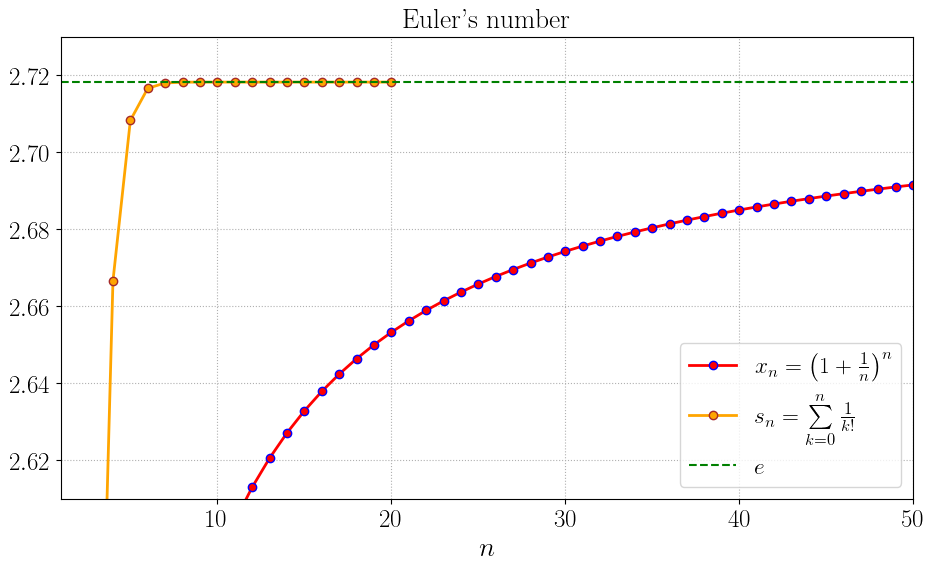

In [5]:
plot_e_limit()

Хорошо видно, что последовательность $s_n$ очень быстро сходится к числу $e$: оранжевая линия при $n > 8$ сливается с пунктирной зелёной линией, соответствующей числу $e$. Обратите внимание на разительный контраст с поведением красной линии! Последовательность $x_n = \big(1 + \frac 1n\big)^n$ из определения числа $e$ сходится к нему гораздо медленнее, чем последовательность частичных сумм {eq}`e-partial-sum`.

Следующая теорема строго математически устанавливает, что $\lim\limits_{n\to\infty} s_n =e$.

````{prf:theorem} 
:label: e-equiv
:nonumber:
Последовательности $(s_n)$ и $(x_n)$ имеют одинаковый предел, т.е.

$$ 
\sum\limits_{n=0}^\infty \frac 1{n!} = \lim\limits_{n\to\infty} \Big(1 + \frac 1n\Big)^n.
$$
````

````{admonition} Доказательство
:class: tip, dropdown
Применим бином Ньютона
$(1+x)^n = \sum\limits_{k=0}^n \binom nk x^k$ к последовательности $(x_n)$:

```{math}
:label: e-binom
    x_n = \Big(1 + \frac 1n\Big)^n = \sum\limits_{k=0}^n \binom nk \frac 1{n^k}
```

Биномиальный коэффициент $\binom nk$, равный количеству способов выбрать $k$ объектов из $n$, можно записать как

$$
    \binom nk = \frac{n!}{k!(n-k)!} = \frac{n^{\underline k}}{k!},
$$

где $n^{\underline k} = n\cdot(n-1)\cdot \ldots \cdot (n-k+1)$ — **убывающая факториальная степень**. С помощью этого обозначения перепишем формулу {eq}`e-binom`:

$$
    \Big(1 + \frac 1n\Big)^n = \sum\limits_{k=0}^n \frac 1{k!}\cdot\frac{n^{\underline k}}{n^k}.
$$

Из неравенства $n^{\underline k} \leqslant n^k$ следует, что 

$$
    \Big(1 + \frac 1n\Big)^n  \leqslant \sum\limits_{k=0}^n \frac 1{k!} = s_n.
$$

Устремляя здесь $n$ к $\infty$, приходим к неравенству $e \leqslant \lim\limits_{n\to\infty} s_n$.
Чтобы получить неравенство в другую сторону, обрежем сумму в {eq}`e-binom`, взяв первые $m$ слагаемых, $0 < m < n$:

$$
    \Big(1 + \frac 1n\Big)^n > \sum\limits_{k=0}^m \binom nk \frac 1{n^k} = \sum\limits_{k=0}^m \frac 1{k!}\cdot\frac{n^{\underline k}}{n^k}.
$$

Зафиксируем $m \in \mathbb N$ и перейдём здесь к пределу при $n\to \infty$; учитывая, что $\lim\limits_{n\to\infty} \frac{n^{\underline k}}{n^k} = 1$, получаем

$$
    \lim\limits_{n\to\infty} \Big(1 + \frac 1n\Big)^n \geqslant \sum\limits_{k=0}^m \frac 1{k!}\cdot \lim\limits_{n\to\infty}\frac{n^{\underline k}}{n^k} = \sum\limits_{k=0}^m \frac 1{k!} = s_m.
$$

Левая часть по определению равна $e$, следовательно $e \geqslant s_m$ при всех $m \in \mathbb N$. Устремив $m\to \infty$, находим, что $e \geqslant \lim\limits_{m\to\infty}s_m$. Вместе с полученным ранее противоположным неравенством это гарантирует, что

$$
    e = \lim\limits_{n\to\infty} s_n = \sum\limits_{n=0}^\infty \frac 1{n!}.
$$
````

<span style="display:none" id="q_e_series_n">W3sicXVlc3Rpb24iOiAiXHUwNDI3XHUwNDM1XHUwNDNjXHUwNDQzIFx1MDQ0MFx1MDQzMFx1MDQzMlx1MDQzZFx1MDQzMCBcdTA0NDFcdTA0NDNcdTA0M2NcdTA0M2NcdTA0MzAgXHUwNDQwXHUwNDRmXHUwNDM0XHUwNDMwICRcXHN1bVxcbGltaXRzX3tuPTF9XlxcaW5mdHkgXFxmcmFjIG57biF9JD8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIiRlJCIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlx1MDQxOCBcdTA0M2ZcdTA0NDBcdTA0MzBcdTA0MzJcdTA0MzRcdTA0MzA6ICRcXHN1bVxcbGltaXRzX3tuPTF9XlxcaW5mdHkgXFxmcmFjIG57biF9ID0gXFxzdW1cXGxpbWl0c197bj0xfV5cXGluZnR5IFxcZnJhYyAxeyhuLTEpIX0gIFxcc3RhY2tyZWx7az1uLTF9ez19IFxcc3VtXFxsaW1pdHNfe2s9MH1eXFxpbmZ0eSBcXGZyYWMgMXtrIX0gPSBlJCJ9LCB7ImFuc3dlciI6ICIkZS0xJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWRcdTA0MzVcdTA0MzJcdTA0MzVcdTA0NDBcdTA0M2RcdTA0M2UuIFx1MDQxNFx1MDQzYlx1MDQ0ZiBcdTA0NDBcdTA0MzVcdTA0NDhcdTA0MzVcdTA0M2RcdTA0MzhcdTA0NGYgXHUwNDMyXHUwNDNlXHUwNDQxXHUwNDNmXHUwNDNlXHUwNDNiXHUwNDRjXHUwNDM3XHUwNDQzXHUwNDM5XHUwNDQyXHUwNDM1XHUwNDQxXHUwNDRjIFx1MDQ0MFx1MDQzMFx1MDQzMlx1MDQzNVx1MDQzZFx1MDQ0MVx1MDQ0Mlx1MDQzMlx1MDQzZVx1MDQzYyAkbiEgPSBuXFxjZG90IChuLTEpISQifSwgeyJhbnN3ZXIiOiAiJGUrMSQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDFkXHUwNDM1XHUwNDMyXHUwNDM1XHUwNDQwXHUwNDNkXHUwNDNlLiBcdTA0MTRcdTA0M2JcdTA0NGYgXHUwNDQwXHUwNDM1XHUwNDQ4XHUwNDM1XHUwNDNkXHUwNDM4XHUwNDRmIFx1MDQzMlx1MDQzZVx1MDQ0MVx1MDQzZlx1MDQzZVx1MDQzYlx1MDQ0Y1x1MDQzN1x1MDQ0M1x1MDQzOVx1MDQ0Mlx1MDQzNVx1MDQ0MVx1MDQ0YyBcdTA0NDBcdTA0MzBcdTA0MzJcdTA0MzVcdTA0M2RcdTA0NDFcdTA0NDJcdTA0MzJcdTA0M2VcdTA0M2MgJG4hID0gblxcY2RvdCAobi0xKSEkIn0sIHsiYW5zd2VyIjogIiQyZSQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDFkXHUwNDM1XHUwNDMyXHUwNDM1XHUwNDQwXHUwNDNkXHUwNDNlLiBcdTA0MTRcdTA0M2JcdTA0NGYgXHUwNDQwXHUwNDM1XHUwNDQ4XHUwNDM1XHUwNDNkXHUwNDM4XHUwNDRmIFx1MDQzMlx1MDQzZVx1MDQ0MVx1MDQzZlx1MDQzZVx1MDQzYlx1MDQ0Y1x1MDQzN1x1MDQ0M1x1MDQzOVx1MDQ0Mlx1MDQzNVx1MDQ0MVx1MDQ0YyBcdTA0NDBcdTA0MzBcdTA0MzJcdTA0MzVcdTA0M2RcdTA0NDFcdTA0NDJcdTA0MzJcdTA0M2VcdTA0M2MgJG4hID0gblxcY2RvdCAobi0xKSEkIn1dfV0=</span>

In [6]:
display_quiz("#q_e_series_n")

<IPython.core.display.Javascript object>

## Оценка погрешности

Представление числа $e$ числовым рядом {eq}`e-series` очень полезно для практических вычислений из-за чрезвычайно быстрой сходимости его частичных сумм $s_n$ к числу $e$. Рекорды по вычислению цифр числа $e$ были установлены именно путём вычисления $s_n$ при достаточно большом $n$. Оценить точность приближения помогает следующая оценка погрешности:

```{math}
:label: e-residual
    e - s_n = \frac{\theta_n}{n!\cdot n}, \quad 0 < \theta_n < 1.
```

Здесь $\theta_n$ — это просто какое-то число из интервала $(0;1)$. Чему равно $\theta_n$ при небольших значениях $n$, можно легко проверить экспериментально.

In [7]:
import math

denominator = 1
partial_sum = 1
for n in range(1, 10):
    denominator *= n
    partial_sum += 1./denominator
    theta_n = (math.e - partial_sum) * n * denominator
    print(f"n = {n}, theta_n = {theta_n}")

n = 1, theta_n = 0.7182818284590451
n = 2, theta_n = 0.8731273138361804
n = 3, theta_n = 0.9290729122628143
n = 4, theta_n = 0.9550555320683571
n = 5, theta_n = 0.9690970754272499
n = 6, theta_n = 0.9774989430752612
n = 7, theta_n = 0.9829080351068242
n = 8, theta_n = 0.9865877495212771
n = 9, theta_n = 0.9892009645173516


Равенство {eq}`e-residual` позволяет оценить, сколько верных цифр числа $e$ даёт приближение $s_n$ при заданном $n$. Например, при $n=5$ имеем

$$
    e - s_5 < \frac 1{5!\cdot 5} = \frac 1{120\cdot 5} = \frac 1{600} < 10^{-2};
$$

это означает, $s_5$ даёт как минимум два верных десятичных знака числа $e$. Это вполне согласуется с данными из  {numref}`таблицы %s <partial-table>`.

<span style="display:none" id="q_e_approx_16">W3sicXVlc3Rpb24iOiAiXHUwNDFmXHUwNDQwXHUwNDM4IFx1MDQzYVx1MDQzMFx1MDQzYVx1MDQzZVx1MDQzYyBcdTA0M2NcdTA0MzhcdTA0M2RcdTA0MzhcdTA0M2NcdTA0MzBcdTA0M2JcdTA0NGNcdTA0M2RcdTA0M2VcdTA0M2MgXHUwNDM3XHUwNDNkXHUwNDMwXHUwNDQ3XHUwNDM1XHUwNDNkXHUwNDM4XHUwNDM4ICRuJCBcdTA0NDdcdTA0MzBcdTA0NDFcdTA0NDJcdTA0MzhcdTA0NDdcdTA0M2RcdTA0MzBcdTA0NGYgXHUwNDQxXHUwNDQzXHUwNDNjXHUwNDNjXHUwNDMwICRzX24kIFx1MDQzNFx1MDQzMFx1MDQ1MVx1MDQ0MiBcdTA0NDFcdTA0NDJcdTA0MzBcdTA0M2RcdTA0MzRcdTA0MzBcdTA0NDBcdTA0NDJcdTA0M2RcdTA0NGJcdTA0MzUgMTYgXHUwNDMyXHUwNDM1XHUwNDQwXHUwNDNkXHUwNDRiXHUwNDQ1IFx1MDQ0Nlx1MDQzOFx1MDQ0NFx1MDQ0MCBcdTA0NDdcdTA0MzhcdTA0NDFcdTA0M2JcdTA0MzAgJGUkPyIsICJ0eXBlIjogIm51bWVyaWMiLCAiYW5zd2VycyI6IFt7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAxNywgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDIyXHUwNDNlXHUwNDQ3XHUwNDNkXHUwNDNlISBcdTA0MTVcdTA0NDFcdTA0M2JcdTA0MzggXHUwNDMyXHUwNDM3XHUwNDRmXHUwNDQyXHUwNDRjICRuPTE2JCwgXHUwNDQyXHUwNDNlIFx1MDQzMiBcdTA0M2ZcdTA0M2VcdTA0NDFcdTA0M2JcdTA0MzVcdTA0MzRcdTA0M2RcdTA0MzVcdTA0M2MgMTYtXHUwNDNjIFx1MDQzN1x1MDQzZFx1MDQzMFx1MDQzYVx1MDQzNSBcdTA0MzFcdTA0NDNcdTA0MzRcdTA0MzVcdTA0NDIgXHUwNDNlXHUwNDQ4XHUwNDM4XHUwNDMxXHUwNDNhXHUwNDMwIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIlx1MDQxZFx1MDQzNSBcdTA0NDFcdTA0M2VcdTA0MzJcdTA0NDFcdTA0MzVcdTA0M2MifV19XQ==</span>

In [8]:
display_quiz("#q_e_approx_16")

<IPython.core.display.Javascript object>

(e-irr-label)=
## Иррациональность числа $e$

Оценка погрешности {eq}`e-residual` полезна не только для практических вычислений, но и для доказательства теоретических фактов о числе $e$.


````{prf:theorem} 
:label: e-irrational
:nonumber:
Число $e$ иррационально, т.е. $e \ne \frac mn$ ни при каких целых числах $m$ и $n$.
````

````{prf:proof} 
Иррациональность обычно доказывают **методом от противного**. Пусть $e = \frac mn$, тогда из {eq}`e-residual` следует, что

$$
    \frac mn = \sum\limits_{k=0}^n \frac 1{k!} + \frac{\theta_n}{n!\cdot n}, \quad 0 < \theta_n < 1.
$$

Домножим обе части равенства на $n!$:

```{math}
:label: e-irr-proof
    m\cdot (n-1)! = \sum\limits_{k=0}^n \frac {n!}{k!} + \frac{\theta_n}{n}, \quad 0 < \theta_n < 1.
```

Числа $\frac{n!}{k!} = n(n-1) \ldots (k+1)$ целые при всех $k$ от $0$ до $n$, стало быть, их сумма $\sum\limits_{k=0}^n \frac {n!}{k!}$ тоже целая. Число $m\cdot (n-1)!$ также целое, а вот число $\frac{\theta_n}{n}$ — как-то не очень, хотя должно быть таковым исходя из равенства {eq}`e-irr-proof`. Полученное противоречие доказывает теорему.
````

## Число $e$ в виде цепной дроби

Эйлер также нашёл разложение числа $e$ в **цепную** (**непрерывную**) **дробь**

```{math}
:label: e-continued
    e = 2  +
\cfrac{1}
   {1 + \cfrac{1}
      {2 + \cfrac{1}
         {1 + \cfrac{1}
            {1 + \cfrac{1}
               {4 + \cfrac{1}
            {1 + \cfrac{1}
               {1 + \ddots}
                  }
               }
            }
         }
      }
   }
```

Более компактная запись того же самого: $e = [2; 1, 2, 1, 1, 4, 1, 1, 6, 1 \dots]$.

````{admonition} Что ещё за цепные дроби?
:class: note, dropdown

Возьмём некоторое действительное число $x$ и выделим у него целую часть: 

$$
a_0 = \lfloor x \rfloor, \quad x_1= x - a_0
$$

Заметим, что $0\leqslant x_1 < 1$ (это дробная часть $x$). Если $x_1=0$, то число $x$ оказалось целым и процесс закончен. В противном случае 

```{math}
:label: continued-1
x = a_0 + x_1 = a_0 + \frac 1{\frac 1{x_1}}.
```

Далее применяем ту же процедуру к числу $\frac 1{x_1} > 1$: выделяем целую часть $a_1 = \left\lfloor \frac 1{x_1} \right\rfloor \geqslant 1$, обозначаем $x_2 = \frac 1{x_1} - a_1$, и переписываем {eq}`continued-1` в виде

$$
    x = a_0 + \frac 1{\frac 1{x_1}} = a_0 + \frac 1{a_1 + x_2}.
$$

При $x_2 > 0$ процесс снова можно продолжить по той же схеме. После $n$ шагов таких вычислений получаем представление

$$
x = a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{\ddots + \cfrac{1}{a_{n-1} + \cfrac{1}{a_n + x_{n+1}}}}}}
$$

Если $x_{n+1} = 0$, то процесс завершается; соответствующая **конечная цепная дробь** обозначается

```{math}
:label: continued-finite
    [a_0; a_1, a_2, \ldots, a_{n-1}, a_n] = a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{\ddots + \cfrac{1}{a_{n-1} + \cfrac{1}{a_n}}}}}.
```

В противном случае процесс продолжается неограниченно долго, и в итоге мы получаем разложение числа $x$ в **бесконечную цепную дробь**:

```{math}
:label: continued-infinite
x = [a_0; a_1, a_2, \ldots, a_n, \ldots] =a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{\ddots + \cfrac{1}{a_{n-1} + \cfrac{1}{a_n + \frac 1{\ddots}}}}}}
```

Конечная цепная дробь {eq}`continued-finite` называется также **подходящей дробью** для цепной дроби {eq}`continued-infinite`. Вообще последняя строго определяется как предел последовательности подходящих дробей:

$$
    [a_0; a_1, a_2, \ldots, a_n, \ldots] = \lim\limits_{n\to\infty} [a_0; a_1, a_2, \ldots, a_{n-1}, a_n].
$$
````

Рассмотрим несколько первых подхоящих дробей к цепной дроби {eq}`e-continued`:

* $x_0 = 2$;
* $x_1 = [2; 1] = 2 + \frac 1{1 } = 3$;
* $x_2 = [2; 1, 2] = 2 + \cfrac 1{1 + \cfrac 1{2}}$;
* $x_3 = [2; 1, 2, 1] = 2 + \cfrac 1{1 + \cfrac 1{2 + \cfrac 1{1}}}$.

<span style="display:none" id="q_e_continued_finite">W3sicXVlc3Rpb24iOiAiXHUwNDI3XHUwNDM1XHUwNDNjXHUwNDQzIFx1MDQ0MFx1MDQzMFx1MDQzMlx1MDQzZFx1MDQzZSAkeF8yJD8iLCAidHlwZSI6ICJudW1lcmljIiwgImFuc3dlcnMiOiBbeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWzIuNjY2NjY2LCAyLjY2NjY2N10sICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlx1MDQxMlx1MDQzNVx1MDQ0MFx1MDQzZFx1MDQzZSEgJDIgKyBcXGZyYWMgMjMgPSBcXGZyYWMgODMkIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIlx1MDQyN1x1MDQ0Mlx1MDQzZS1cdTA0NDJcdTA0M2UgXHUwNDNkXHUwNDM1IFx1MDQ0MVx1MDQzYlx1MDQzZVx1MDQzNlx1MDQzOFx1MDQzYlx1MDQzZVx1MDQ0MVx1MDQ0YyJ9XX0sIHsicXVlc3Rpb24iOiAiXHUwNDI3XHUwNDM1XHUwNDNjXHUwNDQzIFx1MDQ0MFx1MDQzMFx1MDQzMlx1MDQzZFx1MDQzZSAkeF8zJD8iLCAidHlwZSI6ICJudW1lcmljIiwgImFuc3dlcnMiOiBbeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogMi43NSwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDE4XHUwNDNjXHUwNDM1XHUwNDNkXHUwNDNkXHUwNDNlIFx1MDQ0Mlx1MDQzMFx1MDQzYSEgJDIgKyBcXGZyYWMgMzQgPSAyLjc1JCJ9LCB7InR5cGUiOiAiZGVmYXVsdCIsICJmZWVkYmFjayI6ICJcdTA0MjdcdTA0NDJcdTA0M2UtXHUwNDQyXHUwNDNlIFx1MDQzZFx1MDQzNSBcdTA0NDFcdTA0M2JcdTA0M2VcdTA0MzZcdTA0MzhcdTA0M2JcdTA0M2VcdTA0NDFcdTA0NGMifV19XQ==</span>

In [9]:
display_quiz("#q_e_continued_finite")

<IPython.core.display.Javascript object>

Питоновская библиотека [sympy](https://docs.sympy.org/latest/index.html) содержит удобный [модуль](https://docs.sympy.org/latest/modules/ntheory.html#sympy.ntheory) для работы с теоретико-числовыми объектами и, в частности, цепными дробями. Для вычисления следующих значений $x_n$ воспользуемся функцией [`continued_fraction_reduce`](https://docs.sympy.org/latest/modules/ntheory.html#sympy.ntheory.continued_fraction.continued_fraction_reduce).

In [10]:
from sympy.ntheory.continued_fraction import continued_fraction_reduce

e_list =[2, 1, 2, 1, 1, 4, 1, 1, 6, 1, 1, 8, 1, 1, 10, 1, 1, 12, 1]
for n in range(4, 11):
    reduced_fraction = continued_fraction_reduce(e_list[:n+1])
    print(f"n = {n}, x_n = {reduced_fraction} = {reduced_fraction.evalf()}")

n = 4, x_n = 19/7 = 2.71428571428571
n = 5, x_n = 87/32 = 2.71875000000000
n = 6, x_n = 106/39 = 2.71794871794872
n = 7, x_n = 193/71 = 2.71830985915493
n = 8, x_n = 1264/465 = 2.71827956989247
n = 9, x_n = 1457/536 = 2.71828358208955
n = 10, x_n = 2721/1001 = 2.71828171828172


Результаты вычислений занесём в таблицу, аналогичную {numref}`таблице %s <partial-table>`.

```{table} Численные значения подходящих дробей $x_n$
:name: continued-table
|  $n$       | $x_n \text{ (frac)}$  | $x_n \text{ (mixed)}$ | $x_n \text{ (dec)}$ | True digits |
|:-----------:|:--------------|:-----------------|:---------------|:------:|
|  $4$         | $\frac{19}{7}$ | $2\frac{5}{7}$ | $\mathbf{2.71}428\ldots$    | $3$ |
|  $5$         | $\frac{87}{32}$ | $2\frac{23}{32}$ | $\mathbf{2.718}75$    | $4$ |
|  $6$         | $\frac{106}{39}$ | $2\frac{28}{39}$ | $\mathbf{2.71}7948\ldots$    | $3$ |
|  $7$         | $\frac{193}{71}$ | $2\frac{51}{71}$ | $\mathbf{2.718}3098\dots$    | $4$ |
|  $8$         | $\frac{1264}{465}$ | $2\frac{334}{465}$ | $\mathbf{2.7182}79569\ldots$    | $5$ |
|  $9$         | $\frac{1457}{536}$ | $2\frac{385}{536}$ | $\mathbf{2.71828}3582\ldots$    | $6$ |
|  $10$         | $\frac{2721}{1001}$ | $2\frac{719}{1001}$ | $\mathbf{2.718281}71828\ldots$    | $7$|
```

Как и в случае с частичными суммами $s_n$, точность приближения числа $e$ подходящей дробью $x_n$ весьма хороша уже при небольших значениях $n$. Нарисуем графики последовательностей $s_n$ и $x_n$:

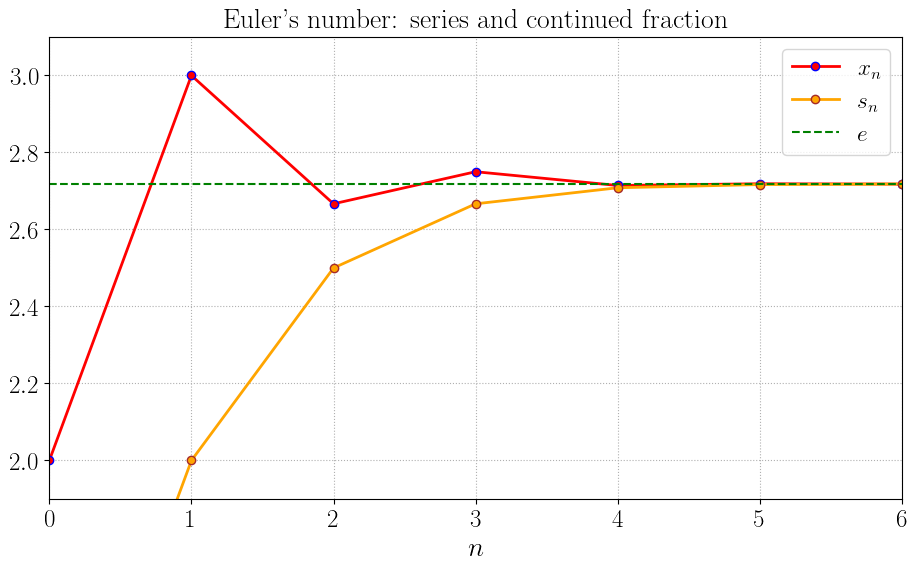

In [11]:
plot_e_taylor_convergent(n_max=6)

Из-за очень быстрой сходимости к числу $e$ графики быстро сливаются, поэтому рисовать их в обычной шкале невыгодно. Для большей информативности нарисуем графики погрешностей в **логарифмической шкале**.

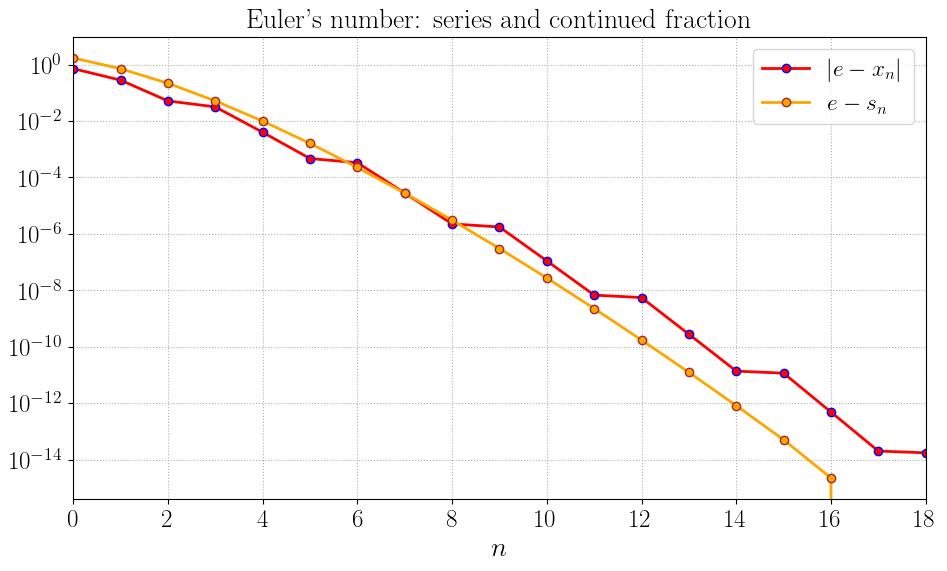

In [12]:
plot_e_taylor_convergent(n_max=18, semilogy=True)

Видно, что поначалу подходящие дроби $x_n$ дают лучшую точность, нежели частичные суммы $s_n$, однако при $n > 8$ ситуация меняется на противоположную (и похоже, что навсегда).

<span style="display:none" id="q_e_approx_continued">W3sicXVlc3Rpb24iOiAiXHUwNDFmXHUwNDQwXHUwNDM4IFx1MDQzYVx1MDQzMFx1MDQzYVx1MDQzZVx1MDQzYyBcdTA0M2NcdTA0MzhcdTA0M2RcdTA0MzhcdTA0M2NcdTA0MzBcdTA0M2JcdTA0NGNcdTA0M2RcdTA0M2VcdTA0M2MgXHUwNDM3XHUwNDNkXHUwNDMwXHUwNDQ3XHUwNDM1XHUwNDNkXHUwNDM4XHUwNDM4ICRuJCBcdTA0M2ZcdTA0M2VcdTA0MzRcdTA0NDVcdTA0M2VcdTA0MzRcdTA0NGZcdTA0NDlcdTA0MzBcdTA0NGYgXHUwNDM0XHUwNDQwXHUwNDNlXHUwNDMxXHUwNDRjICR4X24kIFx1MDQzNFx1MDQzMFx1MDQ1MVx1MDQ0MiBcdTA0NDFcdTA0NDJcdTA0MzBcdTA0M2RcdTA0MzRcdTA0MzBcdTA0NDBcdTA0NDJcdTA0M2RcdTA0NGJcdTA0MzUgMTYgXHUwNDMyXHUwNDM1XHUwNDQwXHUwNDNkXHUwNDRiXHUwNDQ1IFx1MDQ0Nlx1MDQzOFx1MDQ0NFx1MDQ0MCBcdTA0NDdcdTA0MzhcdTA0NDFcdTA0M2JcdTA0MzAgJGUkPyIsICJ0eXBlIjogIm51bWVyaWMiLCAiYW5zd2VycyI6IFt7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAxOSwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiXHUwNDIyXHUwNDNlXHUwNDQ3XHUwNDNkXHUwNDNlISBcdTA0MTVcdTA0NDFcdTA0M2JcdTA0MzggXHUwNDMyXHUwNDM3XHUwNDRmXHUwNDQyXHUwNDRjICRuPTE4JCwgXHUwNDQyXHUwNDNlIFx1MDQzMiBcdTA0MzRcdTA0MzJcdTA0NDNcdTA0NDUgXHUwNDNmXHUwNDNlXHUwNDQxXHUwNDNiXHUwNDM1XHUwNDM0XHUwNDNkXHUwNDM4XHUwNDQ1IFx1MDQzN1x1MDQzZFx1MDQzMFx1MDQzYVx1MDQzMFx1MDQ0NSBcdTA0MzFcdTA0NDNcdTA0MzRcdTA0MzVcdTA0NDIgXHUwNDNlXHUwNDQ4XHUwNDM4XHUwNDMxXHUwNDNhXHUwNDMwLCBcdTA0MzAgXHUwNDNmXHUwNDQwXHUwNDM4ICRuPTE5JCBcdTA0MzJcdTA0NDFcdTA0NTEgXHUwNDQ3XHUwNDUxXHUwNDQyXHUwNDNhXHUwNDNlIn0sIHsidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDIwLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJcdTA0MWZcdTA0M2VcdTA0NDdcdTA0NDJcdTA0MzguIFx1MDQyNVx1MDQzMlx1MDQzMFx1MDQ0Mlx1MDQzOFx1MDQzYlx1MDQzZSBcdTA0MzFcdTA0NGIgXHUwNDM4ICRuPTE5JCwgXHUwNDQ1XHUwNDNlXHUwNDQyXHUwNDRmIFx1MDQzMiBcdTA0NDJcdTA0MzBcdTA0M2FcdTA0M2VcdTA0M2MgXHUwNDQxXHUwNDNiXHUwNDQzXHUwNDQ3XHUwNDMwXHUwNDM1IFx1MDQzZlx1MDQ0MFx1MDQzOCBcdTA0M2VcdTA0M2FcdTA0NDBcdTA0NDNcdTA0MzNcdTA0M2JcdTA0MzVcdTA0M2RcdTA0MzhcdTA0MzggXHUwNDM0XHUwNDNlIDE1LVx1MDQzM1x1MDQzZSBcdTA0MzdcdTA0M2RcdTA0MzBcdTA0M2FcdTA0MzAgXHUwNDNmXHUwNDNlXHUwNDQxXHUwNDNiXHUwNDM1IFx1MDQzNFx1MDQzNVx1MDQ0MVx1MDQ0Zlx1MDQ0Mlx1MDQzOFx1MDQ0N1x1MDQzZFx1MDQzZVx1MDQzOSBcdTA0NDJcdTA0M2VcdTA0NDdcdTA0M2FcdTA0MzggXHUwNDNmXHUwNDNlXHUwNDQxXHUwNDNiXHUwNDM1XHUwNDM0XHUwNDNkXHUwNDRmXHUwNDRmIFx1MDQ0Nlx1MDQzOFx1MDQ0NFx1MDQ0MFx1MDQzMCBcdTA0M2ZcdTA0NDBcdTA0MzVcdTA0MzJcdTA0NDBcdTA0MzBcdTA0NDlcdTA0MzBcdTA0MzVcdTA0NDJcdTA0NDFcdTA0NGYgXHUwNDMyIDYifSwgeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWzIwLjAwMSwgMWUrMThdLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiXHUwNDFmXHUwNDM1XHUwNDQwXHUwNDM1XHUwNDMxXHUwNDNlXHUwNDQwLCBcdTA0NDJcdTA0MzBcdTA0M2EgXHUwNDNmXHUwNDNlXHUwNDNiXHUwNDQzXHUwNDQ3XHUwNDM4XHUwNDQyXHUwNDQxXHUwNDRmIFx1MDQ0Mlx1MDQzZVx1MDQ0N1x1MDQzZFx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQ0YyBcdTA0MzJcdTA0NGJcdTA0NDhcdTA0MzUgXHUwNDQyXHUwNDQwXHUwNDM1XHUwNDMxXHUwNDQzXHUwNDM1XHUwNDNjXHUwNDNlXHUwNDM5In0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFswLCAxOV0sICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJcdTA0MWNcdTA0MzBcdTA0M2JcdTA0M2VcdTA0MzJcdTA0MzBcdTA0NDJcdTA0M2UsIFx1MDQ0Mlx1MDQzZVx1MDQ0N1x1MDQzZFx1MDQzZVx1MDQ0MVx1MDQ0Mlx1MDQzOCBcdTA0M2RcdTA0MzUgXHUwNDQ1XHUwNDMyXHUwNDMwXHUwNDQyXHUwNDM4XHUwNDQyIFx1MDQzZlx1MDQ0MFx1MDQzOCBcdTA0NDJcdTA0MzBcdTA0M2FcdTA0M2VcdTA0M2MgJG4kIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIlx1MDQyN1x1MDQ0Mlx1MDQzZS1cdTA0NDJcdTA0M2UgXHUwNDNkXHUwNDM1XHUwNDMyXHUwNDM1XHUwNDQwXHUwNDNkXHUwNDNlIFx1MDQ0MyBcdTA0MzJcdTA0MzBcdTA0NDEifV19XQ==</span>

In [13]:
display_quiz("#q_e_approx_continued")

<IPython.core.display.Javascript object>

## Задачи

1. Пользуясь равенством $\lim\limits_{n\to\infty} \frac 1n = 0$ и 
    {prf:ref}`арифметическими свойствами предела <arithmetic-limit>`, докажите, что $\lim\limits_{n\to\infty} \frac{n^{\underline k}}{n^k} = 1$ при всех $k\in\mathbb N$.

2. Вычислите сумму ряда $\sum\limits_{n=1}^\infty \frac{n^2}{n!}$.

3. Докажите равенство {eq}`e-residual`:

    $$
        e = 1 + \frac 1{1!} + \ldots + \frac 1{n!} + \frac{\theta_n}{n!\cdot n}, \quad 0 < \theta_n < 1.
    $$

    *Указание*. Воспользуйтесь оценкой 
    
    $$
    e - s_n = \sum\limits_{k=n+1}^\infty \frac 1{k!} = \frac 1{(n+1)!}\bigg(1 + \frac 1{n+2} + \frac 1{(n+2)(n+3)} + \ldots\bigg) < \frac 1{(n+1)!} \sum\limits_{k=0}^\infty \frac 1{(n+2)^k}
    $$
    
    и формулой суммы бесконечно убывающей геометрической прогрессии.
    
4. Численные расчёты показывают, что величина $\theta_n$ из равенства {eq}`e-residual` стремится к единице: $\lim\limits_{n\to\infty} \theta_n = 1$. И, действительно, это следует из теоремы о двух милиционерах {prf:ref}`теоремы о двух милиционерах <bounded-conv>` и неравенств $\frac 1{(n+1)^2} < 1 - \theta_n < \frac 2{(n+1)^2}$, $n\in \mathbb N$. Докажите эту оценку.

5. 💻 Обозначим через $d_n$ количество верных десятичных знаков числа $e$, которые даёт частичная сумма $s_n$ (см. правый столбец {numref}`таблицы %s <partial-table>`). Вычислите $d_n$ для $n\leqslant 100$ и постройте график этой последовательности.

6. 💻 Сделайте то же самое, что и в предыдущей задаче, для количества верных цифр числа $e$, вычисленных с помощью подходящих дробей цепной дроби {eq}`e-continued` (т.е. продолжите правый столбец {numref}`таблицы %s <continued-table>`).